In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ASUS\Downloads\elevvo_intership\train.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
print(df.head())


        Store  Dept       Date  Weekly_Sales  IsHoliday
0           1     1 2010-02-05      24924.50      False
277665     29     5 2010-02-05      15552.08      False
277808     29     6 2010-02-05       3200.22      False
277951     29     7 2010-02-05      10820.05      False
278094     29     8 2010-02-05      20055.64      False


In [3]:
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Weekday"] = df["Date"].dt.weekday
df["Lag_1"] = df["Weekly_Sales"].shift(1)
df["Lag_2"] = df["Weekly_Sales"].shift(2)
df.dropna(inplace=True)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error


X = df[["Day", "Month", "Year", "Weekday", "Lag_1", "Lag_2"]]
y = df["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
root_mean_squared_error(y_test, preds)


21956.69993757238

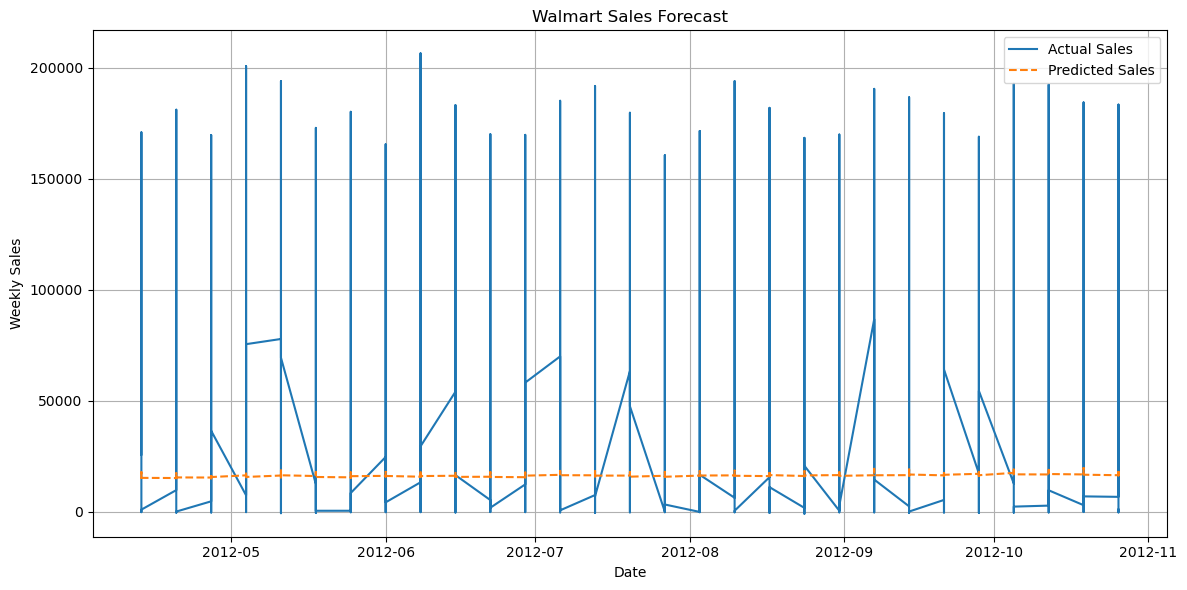

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Date"].iloc[-len(y_test):], y_test, label="Actual Sales")
plt.plot(df["Date"].iloc[-len(y_test):], preds, label="Predicted Sales", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Walmart Sales Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:


df = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
df.set_index("Date", inplace=True)


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

df["rolling_mean_7"] = df["Weekly_Sales"].rolling(window=7).mean()
df["rolling_mean_30"] = df["Weekly_Sales"].rolling(window=30).mean()

decomp = seasonal_decompose(df["Weekly_Sales"], model="additive", period=52)
df["trend"] = decomp.trend
df["seasonal"] = decomp.seasonal
df.dropna(inplace=True)


In [20]:
df["lag_1"] = df["Weekly_Sales"].shift(1)
df["lag_2"] = df["Weekly_Sales"].shift(2)
df.dropna(inplace=True)


In [21]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [24]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

X = df[["rolling_mean_7", "rolling_mean_30", "trend", "seasonal", "lag_1", "lag_2"]]
y = df["Weekly_Sales"]

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = XGBRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    from sklearn.metrics import root_mean_squared_error

   rmse = root_mean_squared_error(y_test, preds)
   print("RMSE:", rmse)


IndentationError: unindent does not match any outer indentation level (<string>, line 18)